In [1]:
import os

import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
print(torch.cuda.is_available())

/home/potate/miniconda3/envs/RL_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True


In [2]:
from environment.connectFourEnv import ConnectFourEnv
from agent.agent import ConnectFourAgent
from agent.policy import VanillaPolicyModel
from agent.train import train, plot_history

In [3]:
environment = ConnectFourEnv(
    win_reward = 10,
    blank_reward = -1e-4
)

In [4]:
WITH_CNN = True

training_policy = VanillaPolicyModel(with_cnn = WITH_CNN)
training_agent = ConnectFourAgent(
    policy = training_policy,
    training = True,
    id_ = 1,
    lr = 1e-3
)

control_policy = VanillaPolicyModel(with_cnn = WITH_CNN)
control_agent = ConnectFourAgent(
    policy = control_policy,
    training = False,
    id_ = -1
)

In [5]:
MAX_MODELS = 10

NUM_EPOCHS = 200
BATCH_SIZE = 32
THRESHOLD = 0.3

In [6]:
for i in range(MAX_MODELS):
    if i > 0:
        control_agent.load_model(os.path.join('saved_models', 'best.pt'))
    history, saved = train(
        num_epochs = NUM_EPOCHS,
        batch_size = BATCH_SIZE,
        threshold = THRESHOLD,
        environment = environment,
        control_agent = control_agent,
        training_agent = training_agent
    )

  5%|██████▎                                                                                                                      | 10/200 [00:03<01:04,  2.94it/s]


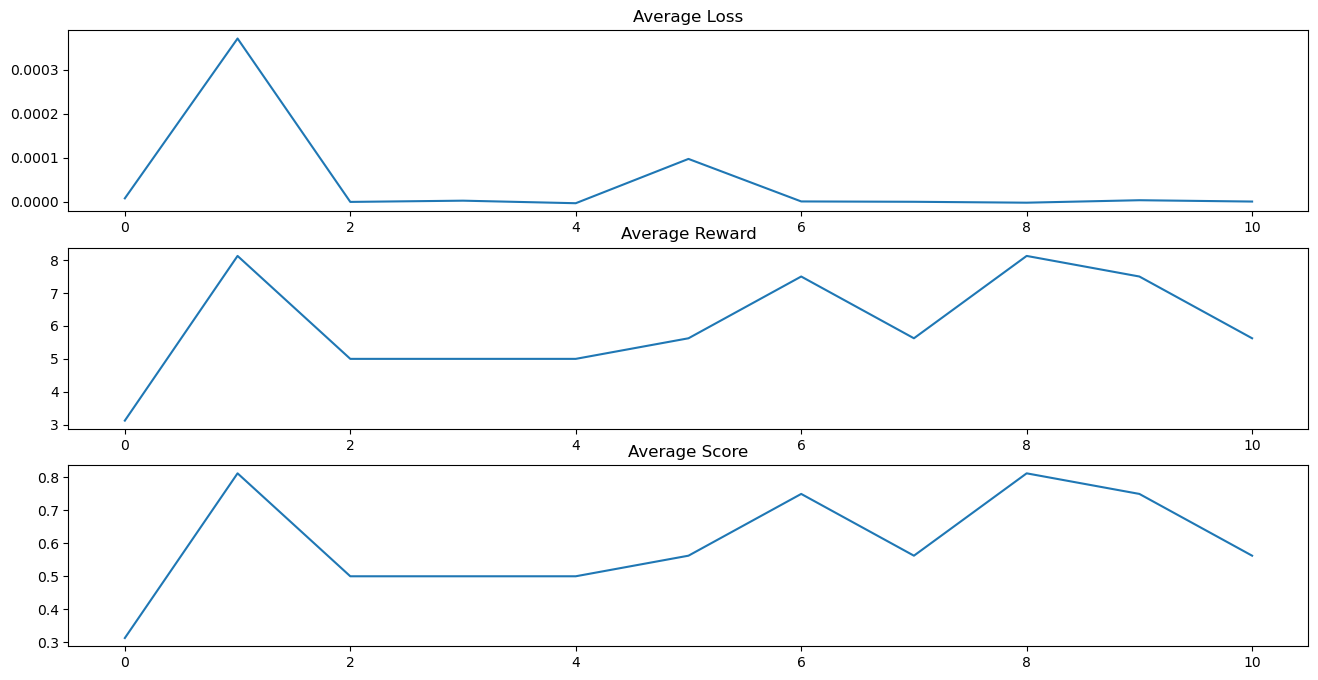

In [14]:
def plot_history(history):
    l, r, s = [], [], []
    for i in range(len(history)):
        l.append(np.mean(history[i]['losses']))
        r.append(np.mean(history[i]['rewards']))
        s.append(np.mean(history[i]['scores']))

    fig, axs = plt.subplots(3, figsize = (16, 8))
    axs[0].set_title('Average Loss')
    axs[0].plot(l)

    axs[1].set_title('Average Reward')
    axs[1].plot(r)

    axs[2].set_title('Average Score')
    axs[2].plot(s)
    
    plt.show()

plot_history(history)